# 1. K-Means Algorithm

## 1.1. The Clustering Problem

**K-Means** is an unsupervised statistical learning algorithm used for clustering.

**Clustering** involves grouping or segmenting a dataset into clusters, where observations in different groups are dissimilar, and those within the same group are similar. Therefor, **clustering** implies understanding what it means for observations to be similar or dissimilar.

To express the problem mathematically, let's assume we want to cluster a set of $N$ observations $\{ 1,2, \dots, N \}$ into $K$ ($\leq N$) clusters $C_1, C_2, \dots, C_K$. Two properties should be satisfied:

* Each observation must belong to at least one of the $K$ groups, i.e.:
  $$
  C_1 \cup C_2 \cup \cdots \cup C_K = \{ 1,2, \dots, N \}
  $$
* No observation can belong to more than one group, i.e., there should be no intersection between clusters:
  $$
  C_k \cap C_{k'} = \emptyset \;\;\; \forall k \neq k'
  $$

If we define the within-cluster variation $W(C_k)$ as a measure evaluating how different the observations within the $k$-th cluster are, the problem is reduced to:

$$
\min_{\{C_1, C_2, \dots, C_K\}}\sum_{k = 1}^K W(C_k) = \min_{\{C_1, C_2, \dots, C_K\}}[W(C_1) + W(C_2) + \cdots + W(C_K)
]$$

In other words, the goal of K-Means is to divide observations into $K$ groups in a way that minimizes the sum of individual variations within each group across all $K$ groups.

## 1.1. Within-cluster variation

The quantity $W(C_k)$ can be understood as a **distance** between observations, and there are different ways to define it depending on the nature of the data and the analysis objectives.

### 1.1.1. Manhattan Distance

The Manhattan distance (named after the grid-like layout of most streets on the island of Manhattan) is also known as the $L_1$ distance.

Given two points $p$ and $q$ with coordinates $(p_1, p_2, \dots, p_N)$ and $(q_1, q_2, \dots, q_N)$ respectively, the Manhattan distance is defined as:

$$d_1(p,q) = \sum_{i=1}^N |p_i - q_i|$$

**Example**

Let's consider two points $p = (2,3)$ and $q = (5,7)$ $\Rightarrow d_1 = |p_1 - q_1| + |p_2 - q_2| = |2 - 5| + |3 - 7| = 3 + 4 = 7$

In [1]:
# Import libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Avoid code suggestions
import warnings
warnings.filterwarnings('ignore')

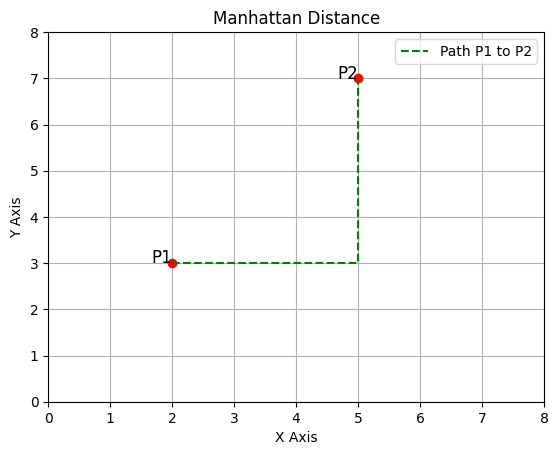

In [2]:
# Define the points
x = [2, 5]
y = [3, 7]

# Plot the points
plt.plot(x, y, 'ro')

# Label the points
plt.text(x[0], y[0], 'P1', fontsize=12, ha='right')
plt.text(x[1], y[1], 'P2', fontsize=12, ha='right')

# Plot the path following the Manhattan distance
plt.plot([x[0], x[1], x[1]], [y[0], y[0], y[1]], 'g--', label='Path P1 to P2')

# Graph settings
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Manhattan Distance')

# Add legend
plt.legend()

# Show the graph
plt.grid(True)
plt.show()

### 1.1.2. Chebyshev Distance

Given two points $p$ and $q$ with coordinates $(p_1, p_2, \dots, p_N)$ and $(q_1, q_2, \dots, q_N)$ respectively, the Chebyshev distance is defined as:

$$
D_C(p,q) = \max_i(|p_i - q_i|)
$$

In 2D, in plane geometry, if the points $p$ and $q$ have Cartesian coordinates $(x_{1},y_{1})$ and $(x_{2},y_{2})$ respectively, their Chebyshev distance is:

$$
D_C(p,q) = \max(|x_2 - x_1|, |y_2 - y_1|)
$$

**Example**

Let's consider two points $p = (3,4)$ and $q = (7,1)$ $\Rightarrow D_C = \max(|7 - 3|, |1 - 4|) = \max(4, 3) = 4$

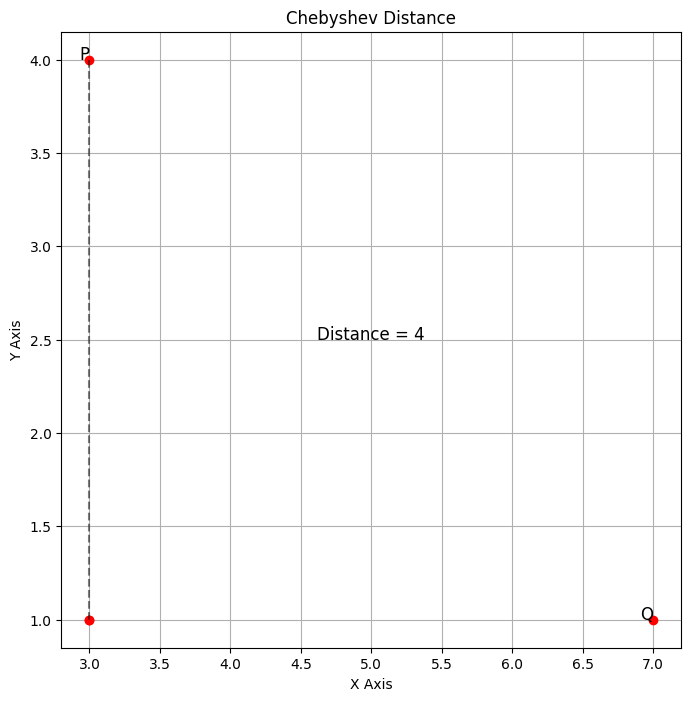

In [3]:
# Define points P and Q
P = (3, 4)
Q = (7, 1)

# Calculate the Chebyshev distance
d = max(abs(Q[0] - P[0]), abs(Q[1] - P[1]))

# Create the plot
plt.figure(figsize=(8, 8))

# Plot points P and Q
plt.plot([P[0], P[0]], [P[1], Q[1]], 'ro')
plt.plot([P[0], Q[0]], [Q[1], Q[1]], 'ro')
plt.text(P[0], P[1], 'P', fontsize=12, ha='right')
plt.text(Q[0], Q[1], 'Q', fontsize=12, ha='right')

# Plot the vertical line (distance)
plt.plot([P[0], P[0]], [P[1], Q[1]], 'k--', alpha=0.5)

# Add text with the distance
plt.text((P[0] + Q[0]) / 2, (P[1] + Q[1]) / 2, f'Distance = {d}', fontsize=12, ha='center')

# Configure the plot
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Chebyshev Distance')

# Show the plot
plt.grid(True)
plt.show()

### 1.1.3. Euclidean Distance

The Euclidean distance between two points $X = (x_1, x_2, \dots, x_N)$ and $Y = (y_1, y_2, \dots, y_N)$ $\in \mathbb{R}^N$ is defined as:

$$
d_E(X,Y) = \sqrt{\sum_{i = 1}^n (x_i - y_i)^2 }
$$

In **2D**, if points X and Y have Cartesian coordinates $(x_{1},y_{1})$ and $(x_{2},y_{2})$ respectively, their Euclidean distance is:

$$
d_E(X,Y) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2}
$$

**Example**

Let's consider two points $X = (1,2)$ and $Y = (4,6)$. For $p=3$, we have $d_E(X, Y) = \sqrt{(1 - 4)^2 + (2 - 6)^2} = \sqrt{9 + 16} = \sqrt{25} = 5$

### 1.1.4. Minkowski Distance

The Minkowski distance of order $p$ (where $p$ is an integer) between two points $X = (x_1, x_2, \dots, x_N)$ and $Y = (y_1, y_2, \dots, y_N)$ $\in \mathbb{R}^N$ is defined as:

$$
D_M(X,Y) = \left( \sum_{i = 1}^N |x_i - y_i|^p \right)^{\frac{1}{p}}
$$

In 2D, if points X and Y have Cartesian coordinates $(x_{1},y_{1})$ and $(x_{2},y_{2})$ respectively, their Minkowski distance is:

$$
D_M(X,Y) = \left( |x_1 - y_1|^p + |x_2 - y_2|^p \right)^{\frac{1}{p}}
$$

When $p = 2$, $D_M(X,Y) = d_E(X,Y)$. Minkowski distance is a generalization of Euclidean distance.

**Example**

Let's consider two points $X = (1,2)$ and $Y = (4,6)$. For $p=3$, we have $D_M(X, Y) = \left( |1 - 4|^3 + |2 - 6|^3 \right)^{\frac{1}{3}} = \sqrt[3]{27 + 64} = \sqrt[3]{91} \approx 4.497$

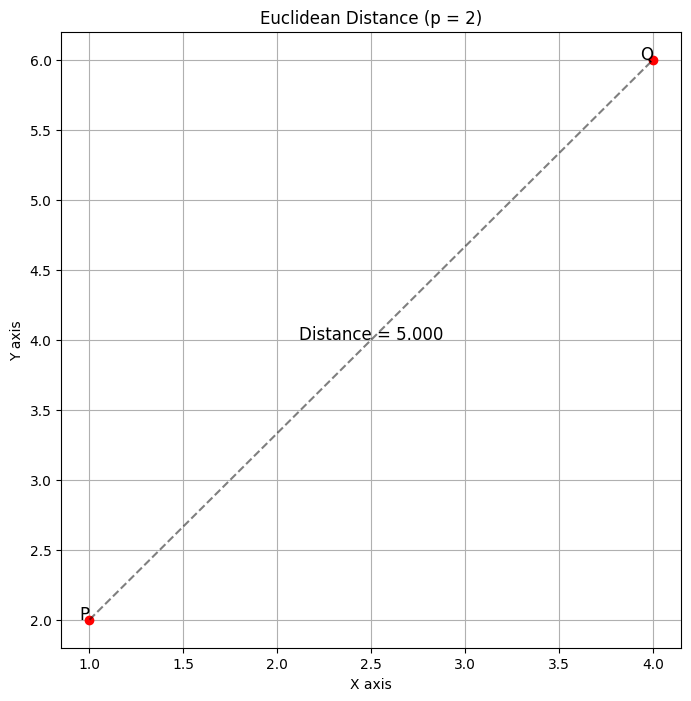

In [4]:
# Define points P and Q
P = (1, 2)
Q = (4, 6)
p = 2

# Calculate Euclidean distance
d = ((Q[0] - P[0])**2 + (Q[1] - P[1])**2)**0.5

# Create the chart
plt.figure(figsize=(8, 8))

# Draw points P and Q
plt.plot([P[0], Q[0]], [P[1], Q[1]], 'ro')
plt.text(P[0], P[1], 'P', fontsize=12, ha='right')
plt.text(Q[0], Q[1], 'Q', fontsize=12, ha='right')

# Draw a line connecting the points (optional)
plt.plot([P[0], Q[0]], [P[1], Q[1]], 'k--', alpha=0.5)

# Add a text with the distance
plt.text((P[0] + Q[0]) / 2, (P[1] + Q[1]) / 2, f'Distance = {d:.3f}', fontsize=12, ha= 'center')

# Configure the graph
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title(f'Euclidean Distance (p = {p})')

# Show the graph
plt.grid(True)
plt.show()

The most commonly used distance in the **K-Means algorithm** is the **Euclidean** distance and it is what we will use from now on.

## 1.2. Clustering by Brute Force

Using the Euclidean distance, we could pose the problem as follows:

Given a set of observations $(\mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_N)$ where each observation is a real vector of $p$ dimensions, we could divide the set into $K$ cluster and for each of those clusters calculate the centroids $\boldsymbol{\mu}_k = \frac{1}{|C_k|}\sum_{\mathbf{x} \in C_k} \mathbf{x} $, where $\frac{1}{|C_k|}$ is the number of observations in the $k$-th group. We would then seek to minimize the sum over all $K$ groups of the sum of the squares of the distances with respect to the centroid within each group. That is to say

$$
\min_{C_1, C_2, \dots, C_K}\sum _{k = 1}^K \sum _{\mathbf{x} \in C_k} || \mathbf{x} - \boldsymbol{\mu}_k||^2 = \min_{C_1, C_2, \dots, C_K}\sum_{k = 1}^K |C_k|\mathrm{Var}(C_k)
$$

**Clustering Example**

![clustering_example](k-means_example.png)

We can implement this idea using "brute force". To this end, a question one could ask in this instance is in how many ways is it possible to assign $N$ observations to $K$ clusters? To answer this question we can address some simple examples.

**Example 1: Case $N = 2$, $K=2$**

| Observation 1 | Observation 2 |
| :- | :- |
| $C_1$ | $C_1$ |
| $C_1$ | $C_2$ |
| $C_2$ | $C_1$ |
| $C_2$ | $C_2$ |

Of these we must discard the cases in which there are empty clusters, which in the example correspond to the first and the last. Therefore, the number of ways to assign 2 observations into 2 clusters by discarding cases of groups without observations is $2 = 2^2 - 2$

**Example 2: Case $N = 3$, $K=2$**

| Observation 1 | Observation 2 | Observation 3 |
| :- | :- | :- |
| $C_1$ | $C_1$ | $C_1$ |
| $C_1$ | $C_1$ | $C_2$ |
| $C_1$ | $C_2$ | $C_1$ |
| $C_1$ | $C_2$ | $C_2$ |
| $C_2$ | $C_1$ | $C_1$ |
| $C_2$ | $C_1$ | $C_2$ |
| $C_2$ | $C_2$ | $C_1$ |
| $C_2$ | $C_2$ | $C_2$ |

Discarding the cases of groups without observations, the number of ways to assign 2 observations in 2 clusters is $6 = 2^3 - 2$

The general expression for the case of arbitrary $K$ and $N$ ($K \leq N$) is:

$$A(N,K) = K^N - \sum _{i=1}^K (-1)^{i-1} {K \choose i} (K-i)^N$$

Hence:

$$A(2,2)=2^2 − {2 \choose 1} \cdot 1^2 = 4 - 2 = 2$$

$$A(3,2)=2^3 − {2 \choose 1} \cdot 1^3 = 8 - 2 = 6$$

$$A(3,3)=3^3 − {3 \choose 1} \cdot 2^3 + {3 \choose 2} \cdot 1^3 = 27 - 24 + 3 = 6$$

$$A(5,4) = 4^5 − {4 \choose 1} \cdot 3^5 + {4 \choose 2} \cdot 2^5 - {4 \choose 3} \cdot 1^5 = 1024 - 972 + 192 - 4= 240$$

In [5]:
def non_empty_allocations(n, K):
     """
     Find the number of ways to assign n observations to K clusters without allowing empty clusters.

     Args:
         n (int): Number of observations.
         K (int): Number of clusters.

     Returns:
         int: Number of allocation forms.
     """
     result = 0
     for i in range(1, K+1):
         result += ((-1)**(i-1)) * math.comb(K, i) * ((K-i)**n)
     return (K**n) - result

# Parameters
K = 4
n = 10

allocations_forms = non_empty_allocations(n, K)
print(f"For K={K} and n={n}, there are {allocations_forms} ways to assign observations to clusters without empty clusters.")

For K=4 and n=10, there are 818520 ways to assign observations to clusters without empty clusters.


In [6]:
def generate_allocations_without_empty_clusters(n, k, current_allocation=[]):
    """
    Generates all possible allocations of n observations to K clusters without empty clusters.

    Args:
        n (int): Number of observations.
        k (int): Number of clusters.
        current_allocation (list, optional): Current allocation of observations to clusters.
                                              Default is an empty list.

    Returns:
        list: List of all possible allocations without empty clusters.
    """
    if len(current_allocation) == n:
        # If all observations have been allocated, return the current allocation if there are no empty clusters.
        if all(cluster in current_allocation for cluster in range(k)):
            return [current_allocation]
        else:
            return []

    all_allocations = []
    for cluster in range(k):
        # For each cluster, create a new allocation with the current cluster.
        new_allocation = current_allocation + [cluster]
        # Recursively call the function with the new allocation.
        all_allocations.extend(generate_allocations_without_empty_clusters(n, k, new_allocation))

    return all_allocations

# Parameters K <= n
n = 5  # Number of observations
k = 3  # Number of clusters

# Call the function to generate allocations without empty clusters
allocations_without_empty_clusters = generate_allocations_without_empty_clusters(n, k)

# Print the total number of possible allocations without empty clusters
print(f"Total number of possible allocations without empty clusters: {len(allocations_without_empty_clusters)}")

# Iterate over the allocations and print them
for i, allocation in enumerate(allocations_without_empty_clusters):
    print(f"Allocation {i + 1}: {allocation}")

Total number of possible allocations without empty clusters: 150
Allocation 1: [0, 0, 0, 1, 2]
Allocation 2: [0, 0, 0, 2, 1]
Allocation 3: [0, 0, 1, 0, 2]
Allocation 4: [0, 0, 1, 1, 2]
Allocation 5: [0, 0, 1, 2, 0]
Allocation 6: [0, 0, 1, 2, 1]
Allocation 7: [0, 0, 1, 2, 2]
Allocation 8: [0, 0, 2, 0, 1]
Allocation 9: [0, 0, 2, 1, 0]
Allocation 10: [0, 0, 2, 1, 1]
Allocation 11: [0, 0, 2, 1, 2]
Allocation 12: [0, 0, 2, 2, 1]
Allocation 13: [0, 1, 0, 0, 2]
Allocation 14: [0, 1, 0, 1, 2]
Allocation 15: [0, 1, 0, 2, 0]
Allocation 16: [0, 1, 0, 2, 1]
Allocation 17: [0, 1, 0, 2, 2]
Allocation 18: [0, 1, 1, 0, 2]
Allocation 19: [0, 1, 1, 1, 2]
Allocation 20: [0, 1, 1, 2, 0]
Allocation 21: [0, 1, 1, 2, 1]
Allocation 22: [0, 1, 1, 2, 2]
Allocation 23: [0, 1, 2, 0, 0]
Allocation 24: [0, 1, 2, 0, 1]
Allocation 25: [0, 1, 2, 0, 2]
Allocation 26: [0, 1, 2, 1, 0]
Allocation 27: [0, 1, 2, 1, 1]
Allocation 28: [0, 1, 2, 1, 2]
Allocation 29: [0, 1, 2, 2, 0]
Allocation 30: [0, 1, 2, 2, 1]
Allocation 31:

Then, for each of these allocations one could calculate $\sum _{k = 1}^K \sum _{\mathbf{x} \in C_k} || \mathbf{x} - \boldsymbol{\mu}_k||^2$ and select from all of them that partition that minimizes this quantity.

In [7]:
def generate_allocations_without_empty_clusters(n, K, current_allocation=[]):
    """
    Generates all possible allocations of n observations to K clusters without empty clusters.

    Args:
        n (int): Number of observations.
        K (int): Number of clusters.
        current_allocation (list, optional): Current allocation of observations to clusters.
                                             Default is an empty list.

    Returns:
        list: List of all possible allocations without empty clusters.
    """
    if len(current_allocation) == n:
        if all(cluster in current_allocation for cluster in range(K)):
            return [current_allocation]
        else:
            return []

    all_allocations = []
    for cluster in range(K):
        new_allocation = current_allocation + [cluster]
        all_allocations.extend(generate_allocations_without_empty_clusters(n, K, new_allocation))

    return all_allocations

def calculate_centroids(X, allocations, K):
    """
    Calculates the centroids of the clusters.

    Args:
        X (numpy.ndarray): Matrix of observations.
        allocations (list): List of allocations of observations to clusters.
        K (int): Number of clusters.

    Returns:
        list: List of centroids.
    """
    centroids = []
    for k in range(K):
        cluster_points = [X[i] for i in range(len(X)) if allocations[i] == k]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
    return centroids

def calculate_sum_of_squared_distances(X, allocations, centroids):
    """
    Calculates the sum of squared distances between observations and centroids.

    Args:
        X (numpy.ndarray): Matrix of observations.
        allocations (list): List of allocations of observations to clusters.
        centroids (list): List of centroids.

    Returns:
        float: Sum of squared distances.
    """
    sum_of_squared_distances = 0
    for i in range(len(X)):
        k = allocations[i]
        sum_of_squared_distances += np.linalg.norm(X[i] - centroids[k])**2
    return sum_of_squared_distances

# Define parameters
n = 5  # Number of observations
K = 3  # Number of clusters
p = 2  # Number of dimensions

allocations_without_empty_clusters = generate_allocations_without_empty_clusters(n, K)

min_sum_of_squared_distances = float('inf')
best_allocation = None
best_centroids = None

# Generate observations (for this example, randomly generated)
np.random.seed(21)
X = np.random.rand(n, p)

# Iterate over the allocations and calculate the results
for allocation in allocations_without_empty_clusters:
    centroids = calculate_centroids(X, allocation, K)
    sum_of_squared_distances = calculate_sum_of_squared_distances(X, allocation, centroids)

    print(f"Allocation: {allocation}")
    print(f"Centroids: {centroids}")
    print(f"Sum of squared distances: {sum_of_squared_distances}\n")

    if sum_of_squared_distances < min_sum_of_squared_distances:
        min_sum_of_squared_distances = sum_of_squared_distances
        best_allocation = allocation
        best_centroids = centroids

print(f"Best partition: {best_allocation}")
print(f"Centroids: {best_centroids}")
print(f"Minimum sum of squared distances: {min_sum_of_squared_distances}")

Allocation: [0, 0, 0, 1, 2]
Centroids: [array([0.32520466, 0.12049972]), array([0.30227189, 0.66391029]), array([0.30811439, 0.58359128])]
Sum of squared distances: 0.2903655836126837

Allocation: [0, 0, 0, 2, 1]
Centroids: [array([0.32520466, 0.12049972]), array([0.30811439, 0.58359128]), array([0.30227189, 0.66391029])]
Sum of squared distances: 0.2903655836126837

Allocation: [0, 0, 1, 0, 2]
Centroids: [array([0.35732104, 0.32487873]), array([0.20592277, 0.05077326]), array([0.30811439, 0.58359128])]
Sum of squared distances: 0.4386898671492646

Allocation: [0, 0, 1, 1, 2]
Centroids: [array([0.38484561, 0.15536295]), array([0.25409733, 0.35734178]), array([0.30811439, 0.58359128])]
Sum of squared distances: 0.4543407474234719

Allocation: [0, 0, 1, 2, 0]
Centroids: [array([0.35926854, 0.29810573]), array([0.20592277, 0.05077326]), array([0.30227189, 0.66391029])]
Sum of squared distances: 0.3879087734373481

Allocation: [0, 0, 1, 2, 1]
Centroids: [array([0.38484561, 0.15536295]), ar

## 1.3. K-Means Clustering

Since there are $A(N,K)$ ways to assign $N$ observations to $K$ groups, the problem with doing this is that even for $K$ and $n$ boys the number of partitions becomes enormous. For example, for $K=4$ and $N=10$, the number of possibilities would be $818,520$.

A way to deal more efficiently is given in the following algorithm written in pseudocode which provides a local minimum and with a problem resolution time $O(N^{pK + 1}log(N))$ although it is **NP-hard** is better than searching for the solution by "brute force" where the order would be $O(K^N)$ (not as exact but faster!).

![k-means_algorithm](k-means_algorithm.png)

In [8]:
def k_means(X, K, iteration=20):
    """
    Function implementing the K-means algorithm for clustering.

    Parameters:
    X (array-like): Data set.
    K (int): Number of clusters.
    iteration (int, optional): Number of iterations. Default is 20.

    Returns:
    dict: A dictionary with cluster allocations, cluster scores (inertias), and centroids at each iteration.
    """
    n, p = X.shape  # Number of observations and dimensions
    center = np.zeros((K, p))  # Initialization of centroids
    y = np.random.choice(K, n, replace=True)  # Initial random cluster allocation
    scores = []  # List to store Sum of Squared Distances (inertias)

    # Loop for algorithm iterations
    for h in range(iteration):
        for k in range(K):
            if np.sum(y == k) == 0:  # Handling special case if a cluster has no allocations
                center[k, 0] = np.inf
            else:
                for j in range(p):
                    center[k, j] = np.mean(X[y == k, j])  # Update centroids

        S_total = 0  # Initialization of total Sum of Squared Distances (inertia)

        # Loop to calculate cluster allocation for each observation
        for i in range(n):
            S_min = np.inf  # Initialization of minimum distance
            for k in range(K):
                S = np.sum((X[i,] - center[k,])**2)  # Calculate distance to centroid
                if S < S_min:
                    S_min = S
                    y[i] = k  # Assign observation to cluster with nearest centroid
            S_total += S_min  # Accumulate inertia

        scores.append(S_total)  # Store inertia for this iteration

    return {'clusters': y, 'scores': scores, 'centroids': center}

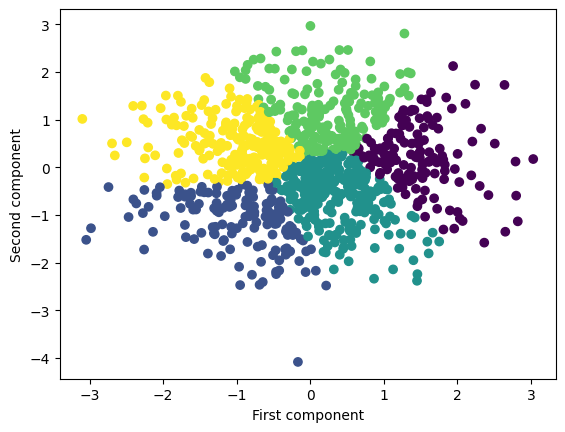

In [9]:
np.random.seed(115)
n = 1000  # Number of observations
K = 5     # Number of clusters
p = 2     # Number of dimensions

X = np.random.randn(n, p)  # Data generation

clusters = k_means(X, K)['clusters']  # Getting cluster for each sample

# Change color for each cluster and draw a point
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.xlabel("First component")
plt.ylabel("Second component")
plt.show()